In [2]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from internet
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

# The below will change due to other stocks

In [3]:
# The tech stocks 
tech_list=["AAPL","GOOG","MSFT","AMZN"]

#
# We will extend this list for Turkish stocks in the future
#

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

#This only applies for DataReader Yahoo library

In [4]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:
    globals()[stock] = web.DataReader(stock,"morningstar",start,end)
    
#I have to get another way to create dataframe for other stocks and for loops

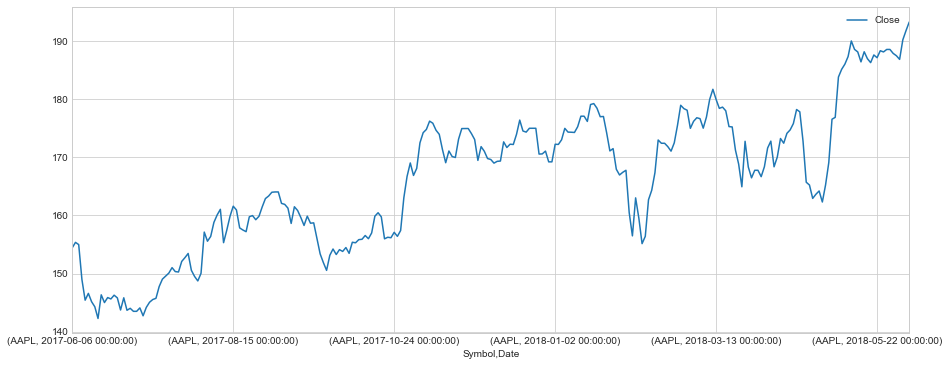

In [5]:
#Closing Prices

AAPL["Close"].plot(legend=True,figsize=(15,6))

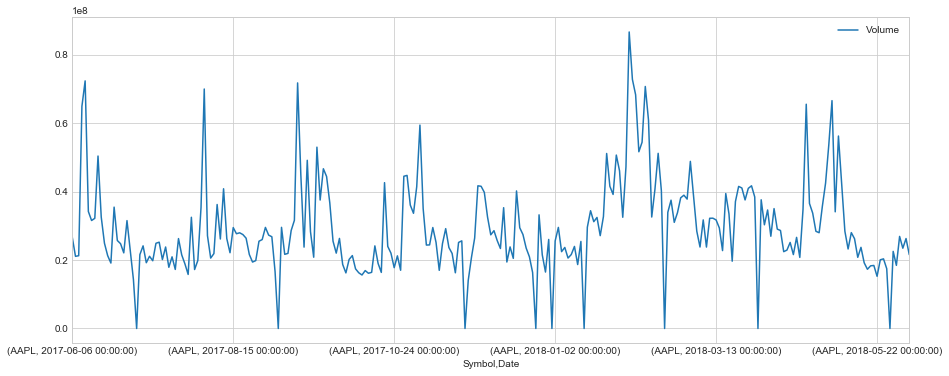

In [6]:
AAPL["Volume"].plot(legend=True,figsize=(15,6))

In [7]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name="MA %s days" %(str(ma))
    AAPL[column_name]=AAPL["Close"].rolling(ma).mean()

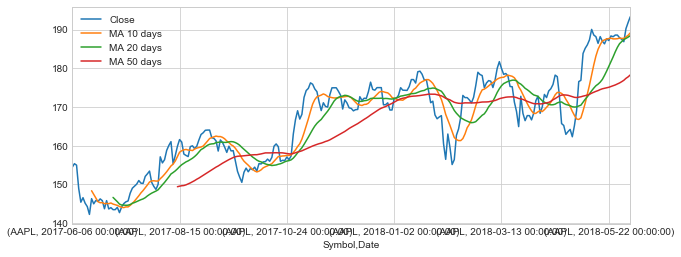

In [8]:
AAPL[['Close','MA 10 days','MA 20 days','MA 50 days']].plot(subplots=False,figsize=(10,4))

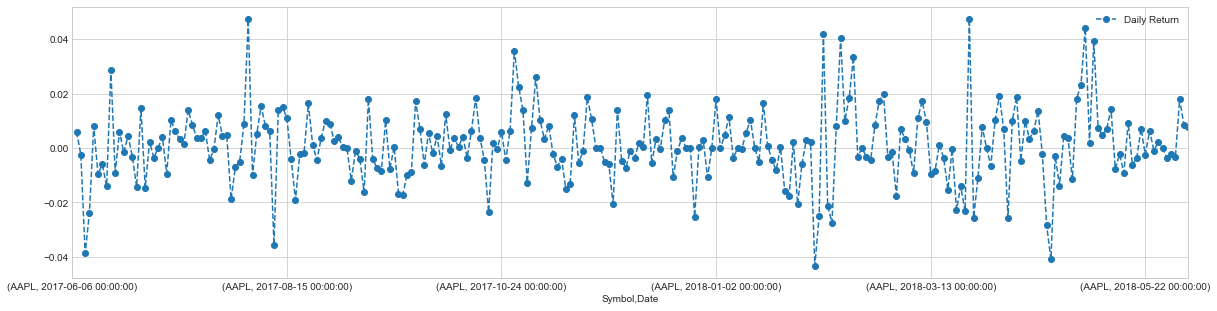

In [9]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(20,5),legend=True,linestyle='--',marker='o')

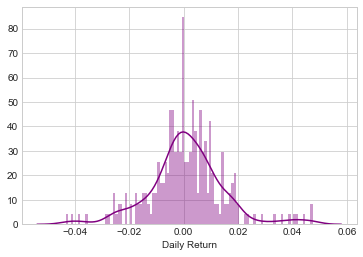

In [10]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

# Could have also done:
#AAPL['Daily Return'].hist()

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],"morningstar",start,end)["Close"]
closing_df = pd.DataFrame(closing_df)


closing_df = closing_df.pivot_table(index="Date",columns="Symbol",values="Close")
closing_df

Symbol,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-06-06,154.45,1003.000,976.57,72.52
2017-06-07,155.37,1010.070,981.08,72.39
2017-06-08,154.99,1010.270,983.41,71.95
2017-06-09,148.98,978.310,949.83,70.32
2017-06-12,145.42,964.910,942.90,69.78
2017-06-13,146.59,980.790,953.40,70.65
2017-06-14,145.16,976.470,950.76,70.27
2017-06-15,144.29,964.170,942.31,69.90
2017-06-16,142.27,987.710,939.78,70.00


In [12]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

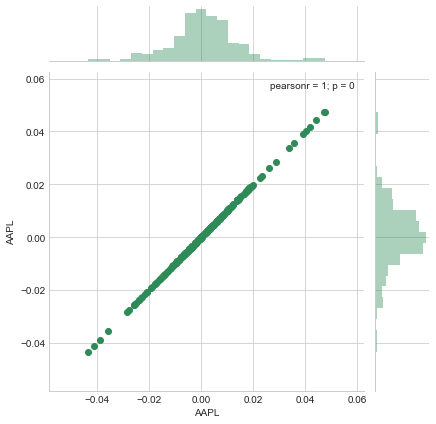

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('AAPL','AAPL',tech_rets,kind='scatter',color='seagreen')

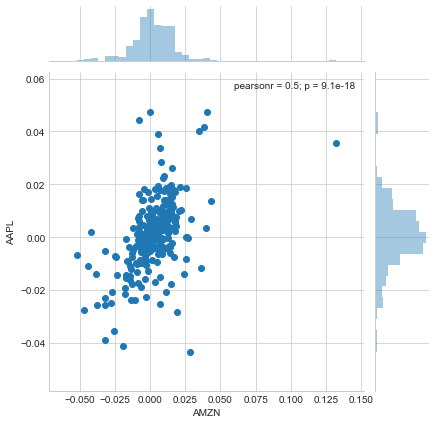

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('AMZN','AAPL',tech_rets,kind='scatter')

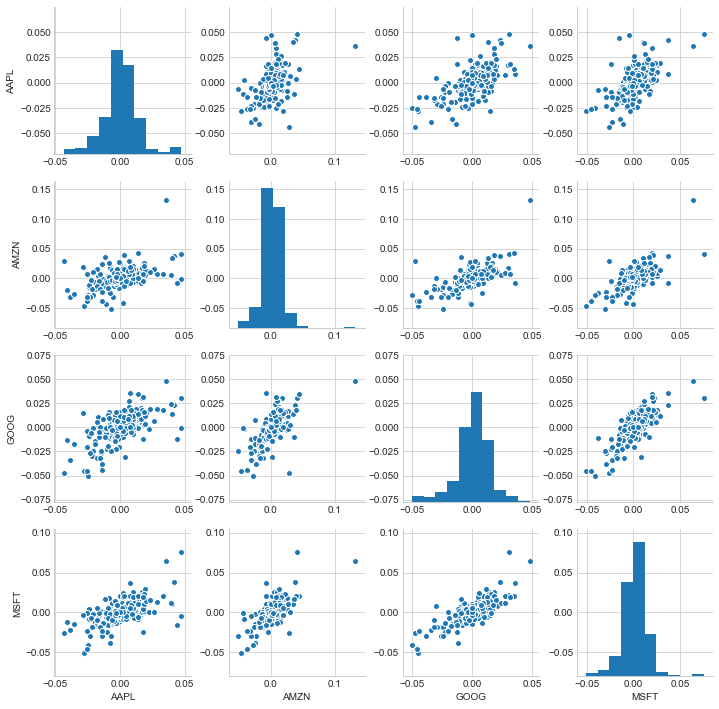

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

C:\Users\cemgu\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


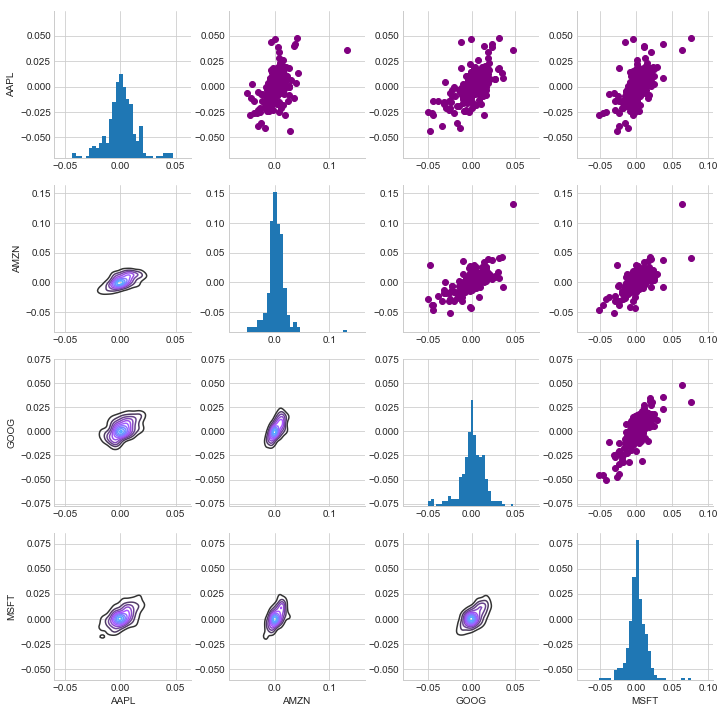

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

C:\Users\cemgu\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


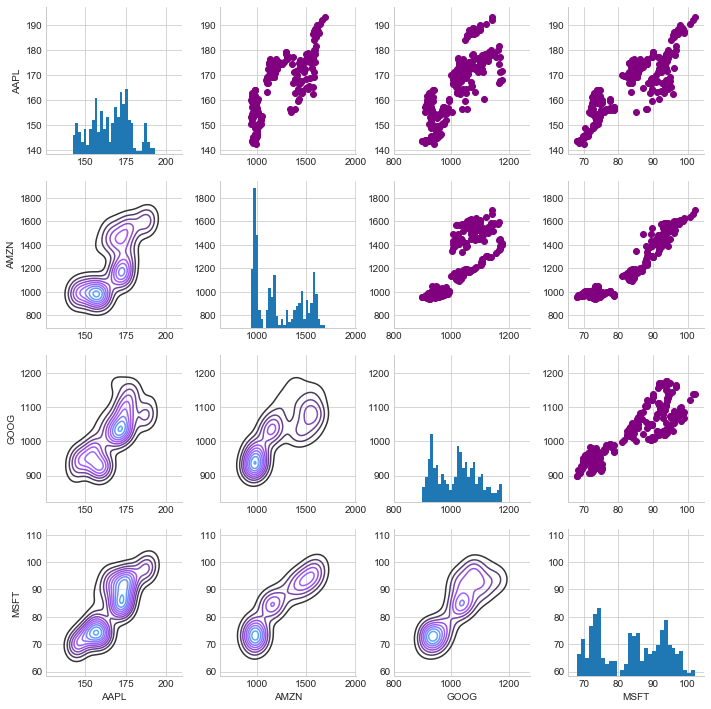

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

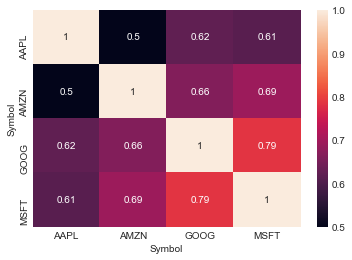

In [18]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns

sns.heatmap(tech_rets.corr(),annot=True)

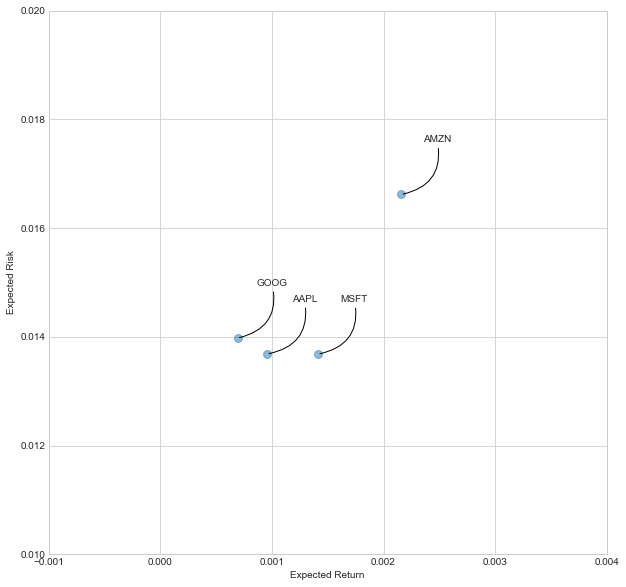

In [19]:
#Risk Analysis
rets=tech_rets.dropna()

area=np.pi*20

plt.figure(figsize=(10,10))

plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)
# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)

plt.ylim([0.01,0.02])
plt.xlim([-0.001,0.004])

plt.xlabel("Expected Return")
plt.ylabel("Expected Risk")



#Annotation guide
# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords ="offset points",ha="right",va="bottom",
        arrowprops =dict(arrowstyle="-",connectionstyle="arc3,rad=-0.5"))

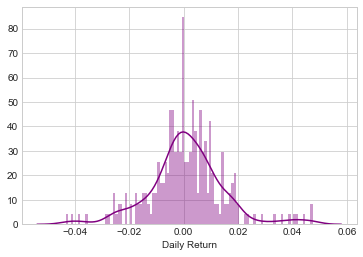

In [20]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [21]:
# The 0.05 empirical quantile of daily returns
#95 percent confidence at worst loss
rets['AAPL'].quantile(0.05)



-0.022679745200913027

In [22]:
rets['AMZN'].quantile(0.05)

-0.02485491975787825

In [23]:
rets['GOOG'].quantile(0.05)

-0.02466473116857549

In [24]:
rets['MSFT'].quantile(0.05)

-0.019023894974329988

In [30]:
#Time horizon 
t=365

#Delta Time
dt=1/t

#Mean or expected return
mu=rets.mean()["GOOG"]

#Standard deviation
sigma=rets.std()["GOOG"]

In [31]:
def stock_montecarlo(startprice,days,mu,sigma):
    #initiate price array
    
    price=np.zeros(days)
    price[0]=startprice
    #Shock and Drift
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        
        #Calculate Shock
        #Scale could be 1.0 however std*delta t waves
        #Loc is where where is drift = mu * dt
        
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        #Calculate Drift
        drift[x]= mu*dt
        
        #Calculate Price
        price[x]= price[x-1]+ (price[x-1]*(drift[x]+shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

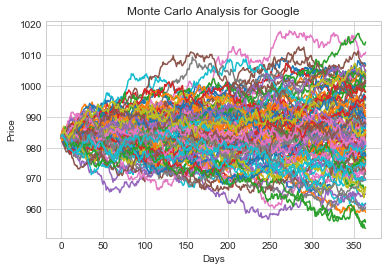

In [32]:
#Get Price from GOOG.head() 

start_goog=983.68

for run in range(100):
    plt.plot(stock_montecarlo(start_goog,t,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google")

In [28]:
runs = 10000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run] = stock_montecarlo(start_goog,t,mu,sigma)[t-1]

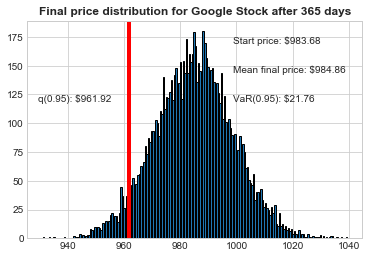

In [29]:
# 1% imperical quantile for simulations list
q=np.percentile(simulation,5)

#ec black makes histogram show vertical lines
plt.hist(simulation,bins=200,histtype='bar',ec='black')

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_goog)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

# Variance of the price (within 95% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.95): $%.2f" % (start_goog - q,))

# Display 5% quantile
plt.figtext(0.15, 0.6, "q(0.95): $%.2f" % q)

# Plot a line at the 5% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % t, weight='bold');